# Projeto de Regressão: Previsão de Preços do Airbnb no Rio de Janeiro

**Discente:** Júlia Alanne Silvino dos Santos

**Discente:** Pablo Durkheim Fernandes do Nascimento

## 1. Introdução e Definição do Problema

O objetivo deste projeto é desenvolver um modelo de Machine Learning capaz de prever o preço de diárias de imóveis anunciados na plataforma Airbnb na cidade do Rio de Janeiro. Para isso, utilizaremos um dataset público do portal *Inside Airbnb*.

O desenvolvimento seguirá um pipeline padrão de projetos de ciência de dados:
*  **Análise Exploratória dos Dados (EDA):** Para entender a estrutura, a


qualidade e os padrões dos dados.
*  **Pré-Processamento e Limpeza:** Para preparar os dados para a modelagem.
*  **Modelagem:** Utilizaremos a biblioteca LazyPredict para criar um *baseline* de desempenho com diversos modelos tradicionais e, em seguida, desenvolveremos um modelo de rede neural com PyTorch para buscar um resultado otimizado.
*  **Avaliação e Conclusão:** Analisaremos os resultados para determinar a eficácia dos modelos.

## 2. Preparação do Ambiente e Carregamento dos Dados

Nesta primeira etapa, importamos todas as bibliotecas que serão utilizadas ao longo do projeto, como `pandas` para manipulação de dados, `matplotlib` e `seaborn` para visualização, e `pycaret` para a modelagem automatizada.

Em seguida, carregamos o nosso conjunto de dados, o arquivo `listings.csv`, que contém as informações detalhadas sobre os anúncios.

In [ ]:


# Instalação da biblioteca LazyPredict
# O PyTorch já vem pré-instalado na maioria dos ambientes Colab.
!pip install lazypredict

In [ ]:
# Importação das bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Análise Exploratória (EDA), Limpeza e Seleção de Features
 Uma análise profunda e uma limpeza cuidadosa garantem que o modelo será treinado com dados de alta qualidade, o que impacta diretamente sua performance. Dessa forma, nosso objetivo é:
1.  Entender a fundo cada variável.
2.  Tratar inconsistências, como valores ausentes e formatos incorretos.
3.  Selecionar as features mais promissoras para prever o preço.



In [ ]:
# Configuração para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Carregamento dos dados a partir do link fornecido no notebook base
# O comando !wget baixa o arquivo e o !gunzip descompacta.
!wget -O listings.csv.gz "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz"
!gunzip -k listings.csv.gz

# Leitura do arquivo CSV para um DataFrame do Pandas
df_raw = pd.read_csv("listings.csv")

# Visualização das primeiras linhas para entender os dados
print("Visualização inicial dos dados:")
display(df_raw.head())

# Verificação das informações gerais do DataFrame, como tipos de dados e valores nulos
print("\nInformações gerais do DataFrame:")
df_raw.info()

--2025-09-28 20:15:19--  https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 18.165.98.33, 18.165.98.12, 18.165.98.100, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|18.165.98.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21857120 (21M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  20.84M  --.-KB/s    in 0.07s   

2025-09-28 20:15:19 (292 MB/s) - ‘listings.csv.gz’ saved [21857120/21857120]

gzip: listings.csv already exists; do you wish to overwrite (y or n)? y
Visualização inicial dos dados:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,https://www.airbnb.com/users/show/11706874,Guilherme,2014-01-27,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/11706874/prof...,https://a0.muscache.com/im/users/11706874/prof...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,Anil,NaN,-22.95221,-43.32944,Entire home,Entire home/apt,12,5.0,5 baths,5.0,10.0,"[""Washer"", ""Hot tub"", ""Breakfast"", ""TV with st...","$2,700.00",10,30,10,10,30,30,10.0,30.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,https://www.airbnb.com/users/show/10405816,Eurico,2013-12-03,"Rio de Janeiro, Brazil",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/10405816/prof...,https://a0.muscache.com/im/users/10405816/prof...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Ipanema,NaN,-22.98767,-43.18991,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Washer"", ""TV with standard cable"", ""Wifi"", ""...",$837.00,7,14,7,7,14,14,7.0,14.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,https://www.airbnb.com/users/show/4107346,Vera Lucia,2012-11-09,"Rio de Janeiro, Brazil",Sou uma pessoa que adora receber turistas no R...,within a few hours,100%,62%,f,https://a0.muscache.com/im/users/4107346/profi...,https://a0.muscache.com/im/users/4107346/profi...,Copacabana,1.0,1.0,"['email', 'phone']",t,t,"Copacabana, Rio de Janeiro, Brazil",Copacabana,NaN,-22.97333,-43.18857,Entire rental unit,Entire home/apt,7,2.0,2 baths,3.0,6.0,"[""Dedicated workspace"", ""Dishes and silverware...",$800.00,5,90,5,5,90,90,5.0,90.0,NaN,t,25,47,77,257,2025-03-20,13,3,1,257,4,30,24000.0,2020-01-07,2025-03-05,5.00,5.00,4.92,5.00,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,Studio 


Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42013 non-null  int64  
 1   listing_url                                   42013 non-null  object 
 2   scrape_id                                     42013 non-null  int64  
 3   last_scraped                                  42013 non-null  object 
 4   source                                        42013 non-null  object 
 5   name                                          42013 non-null  object 
 6   description                                   40982 non-null  object 
 7   neighborhood_overview                         16819 non-null  object 
 8   picture_url                                   42013 non-null  object 
 9   host_id                    

### 3.1. Seleção de Features para o Modelo

A escolha das features é uma etapa fundamental para o sucesso do modelo. Selecionamos um conjunto de colunas que capturam os principais fatores que influenciam o preço de um aluguel, agrupados em quatro categorias principais:

* **Qualidade e Anfitrião:** Features como `host_is_superhost` e `review_scores_rating` servem como indicadores da qualidade do serviço e da confiabilidade do anfitrião.
* **Localização Geográfica:** As coordenadas `latitude` e `longitude` são essenciais, pois a localização é um dos fatores mais críticos na precificação de imóveis no Rio de Janeiro.
* **Características da Propriedade:** Atributos como `accommodates`, `bedrooms`, `property_type` e `room_type` descrevem o tamanho, a capacidade e a natureza do imóvel alugado.
* **Regras de Negócio e Popularidade:** Colunas como `minimum_nights` e `number_of_reviews` refletem a estratégia de negócio do anfitrião e a demanda pela propriedade.

Essa seleção fornece ao modelo uma base de informações robusta para prever os preços com maior precisão.

In [ ]:
# Seleção de colunas que podem influenciar o preço do aluguel
# A escolha se baseia em características do imóvel e do anfitrião.
features_selecionadas = [
    'host_response_rate',       # Taxa de resposta do anfitrião
    'host_is_superhost',        # Se o anfitrião é "Superhost"
    'latitude',                 # Latitude (localização)
    'longitude',                # Longitude (localização)
    'property_type',            # Tipo da propriedade
    'room_type',                # Tipo do quarto (inteiro, privado, etc.)
    'accommodates',             # Número de hóspedes que acomoda
    'bathrooms_text',           # Descrição dos banheiros
    'bedrooms',                 # Número de quartos
    'beds',                     # Número de camas
    'price',                    # Preço (nossa variável alvo)
    'minimum_nights',           # Mínimo de noites
    'number_of_reviews',        # Número de avaliações
    'review_scores_rating',     # Nota média das avaliações
    'instant_bookable'          # Se permite reserva instantânea
]

df = df_raw[features_selecionadas].copy()

print("DataFrame após a seleção de features:")
display(df.head())

DataFrame após a seleção de features:


,host_response_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,NaN,f,-22.95221,-43.32944,Entire home,Entire home/apt,12,5 baths,5.0,10.0,"$2,700.00",10,0,NaN,f
1,NaN,f,-22.98767,-43.18991,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,$837.00,7,0,NaN,f
2,100%,f,-22.97333,-43.18857,Entire rental unit,Entire home/apt,7,2 baths,3.0,6.0,$800.00,5,13,5.00,f
3,98%,f,-22.96477,-43.17605,Entire rental unit,Entire home/apt,3,1 bath,0.0,2.0,$190.00,3,193,4.69,f
4,100%,f,-22.96820,-43.18523,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,$220.00,2,28,4.89,f


### 3.2. Tratamento e Pré-processamento dos Dados

Para preparar os dados brutos para a modelagem, foi executado um pipeline de limpeza e transformação em três etapas principais:

1.  **Correção de Formato e Extração:** Colunas textuais como `price`, `host_response_rate` e `bathrooms_text` foram convertidas para um formato numérico limpo. Isso envolveu a remoção de símbolos ($, %, vírgulas) e a extração de valores numéricos de textos.

2.  **Preenchimento de Valores Ausentes:** Para evitar a perda de dados, valores nulos em colunas numéricas foram preenchidos com a **mediana** (uma medida robusta a outliers), enquanto os de colunas categóricas foram preenchidos com a **moda** (o valor mais frequente).

3.  **Conversão para Formato Numérico:** Todas as colunas categóricas restantes foram transformadas em um formato numérico que o modelo pudesse entender, utilizando a conversão binária (1/0) para colunas booleanas e a técnica de *One-Hot Encoding* para as demais.

In [ ]:
# --- Tratamento da variável alvo: 'price' ---
# A coluna 'price' está como texto (object) com '$' e ','. Precisamos convertê-la para número (float).
df['price'] = pd.to_numeric(df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False), errors='coerce')

# Remove linhas onde o preço é nulo (passo essencial)
df.dropna(subset=['price'], inplace=True)

# Converte 'host_response_rate' para numérico
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', '', regex=False), errors='coerce') / 100.0

# Extrai o número de banheiros de 'bathrooms_text'
df['bathrooms'] = pd.to_numeric(df['bathrooms_text'].str.extract('(\d+\.?\d*)')[0], errors='coerce')
df.drop('bathrooms_text', axis=1, inplace=True)

# --- ETAPA 2: Preenchimento de Valores Nulos (Imputação) ---

# Colunas numéricas: preenche com a MEDIANA
cols_numericas = ['bedrooms', 'beds', 'review_scores_rating', 'host_response_rate', 'bathrooms']
for col in cols_numericas:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# CORREÇÃO: Preenchemos os valores nulos de 'host_is_superhost' ANTES de converter. Usamos a moda (o valor mais comum).
mode_superhost = df['host_is_superhost'].mode()[0]
df['host_is_superhost'].fillna(mode_superhost, inplace=True)

# --- ETAPA 3: Transformação Final ---

# AGORA que não há mais nulos, convertemos 't'/'f' para 1/0.
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

# One-Hot Encoding para as colunas categóricas restantes (sem 'drop_first=True' para clareza)
df = pd.get_dummies(df, columns=['property_type', 'room_type'])

# --- ETAPA 4: Verificação Final ---

print("--- Análise da Contagem de Linhas APÓS a Correção ---")
df.info()

print("\n--- DataFrame final após todas as transformações ---")
display(df.head())

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-98459926.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['bathrooms'] = pd.to_numeric(df['bathrooms_text'].str.extract('(\d+\.?\d*)')[0], errors='coerce')


--- Análise da Contagem de Linhas APÓS a Correção ---
<class 'pandas.core.frame.DataFrame'>
Index: 38356 entries, 0 to 42012
Data columns (total 95 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_rate                                38356 non-null  float64
 1   host_is_superhost                                 38356 non-null  int64  
 2   latitude                                          38356 non-null  float64
 3   longitude                                         38356 non-null  float64
 4   accommodates                                      38356 non-null  int64  
 5   bedrooms                                          38356 non-null  float64
 6   beds                                              38356 non-null  float64
 7   price                                             38356 non-null  float64
 8   minimum_nights                                 

/tmp/ipython-input-98459926.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-98459926.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,host_response_rate,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,bathrooms,property_type_Boat,property_type_Camper/RV,property_type_Campsite,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Dome,property_type_Earthen home,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire chalet,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Farm stay,property_type_Houseboat,property_type_Hut,property_type_Island,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in casa particular,property_type_Private room in castle,property_type_Private room in chalet,property_type_Private room in condo,property_type_Private room in cottage,property_type_Private room in earthen home,property_type_Private room in farm stay,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in loft,property_type_Private room in nature lodge,property_type_Private room in rental unit,property_type_Private room in resort,property_type_Private room in serviced apartment,property_type_Private room in shipping container,property_type_Private room in tent,property_type_Private room in tiny home,property_type_Private room in tower,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in vacation home,property_type_Private room in villa,property_type_Ranch,property_type_Room in aparthotel,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in aparthotel,property_type_Shared room in bed and breakfast,property_type_Shared room in condo,property_type_Shared room in cottage,property_type_Shared room in earthen home,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.00,0,-22.95221,-43.32944,12,5.0,10.0,2700.0,10,0,4.92,0,5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1.00,0,-22.98767,-43.18991,4,2.0,3.0,837.0,7,0,4.92,0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,

### 3.3. Tratamento de Outliers com o Método IQR

Para melhorar a performance do modelo, removemos *outliers* — dados extremos (como preços ou estadias mínimas irrealistas) que podem distorcer o aprendizado.

Utilizamos o método estatístico do **Intervalo Interquartil (IQR)**, que define limites aceitáveis para os dados. Qualquer ponto fora desses limites foi considerado um outlier e removido. Este filtro foi aplicado a colunas críticas como `price` e `minimum_nights`.

Como resultado, **14.131 linhas** com valores extremos foram eliminadas, gerando um dataset mais limpo e representativo para a modelagem.

In [ ]:
# DataFrame 'df' deve ser aquele após a limpeza e transformação, mas ANTES da remoção de outliers.
# Certifique-se de ter executado o código de limpeza da resposta anterior.

# --- 1. Definir as colunas para verificar outliers ---
# Escolhemos colunas numéricas onde valores extremos não fazem sentido prático.
colunas_para_robustecer = [

    'latitude',                 # Latitude (localização)
    'longitude',                # Longitude (localização)
    'accommodates',             # Número de hóspedes que acomoda
    'bedrooms',                 # Número de quartos
    'beds',                     # Número de camas
    'price',                    # Preço (nossa variável alvo)
    'minimum_nights',           # Mínimo de noites
    'number_of_reviews',        # Número de avaliações
    'review_scores_rating',     # Nota média das avaliações

]

df_antes = df.copy()
print(f"Número de linhas antes da remoção robusta: {len(df_antes)}")

# --- 2. Aplicar o filtro IQR para cada coluna ---
df_depois = df_antes.copy()

for col in colunas_para_robustecer:
    Q1 = df_depois[col].quantile(0.25)
    Q3 = df_depois[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra o DataFrame, mantendo apenas as linhas dentro dos limites para a coluna atual
    df_depois = df_depois[(df_depois[col] >= limite_inferior) & (df_depois[col] <= limite_superior)]

print(f"Número de linhas após a remoção robusta: {len(df_depois)}")
print(f"Total de linhas removidas: {len(df_antes) - len(df_depois)}")

# Agora você pode seguir com a separação de X e y a partir de 'df_depois'
X_clean_robusto = df_depois.drop('price', axis=1)
y_clean_robusto = df_depois['price']

Número de linhas antes da remoção robusta: 38356
Número de linhas após a remoção robusta: 24225
Total de linhas removidas: 14131


In [ ]:
import numpy as np
import datetime
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torch.optim as optim
import torch.nn as nn
%matplotlib inline
plt.style.use('fivethirtyeight')

## Architecture class

In [ ]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class

        # We start by storing the arguments as attributes
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None

        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model,
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer

        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Once the data loader and step function, this is the same
        # mini-batch loop we had before
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)



    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename,weights_only=False)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval()
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()

        return fig

## Data Preparation

In [ ]:
# ---------------------------------------------------------------------
# 1) Extract features (X) and target (y) from the DataFrame
# ---------------------------------------------------------------------

# Keep all numeric feature columns except the target 'price'
feature_cols = [c for c in df_depois.columns if c != "price"]
target_col   = "price"

# Convert to NumPy arrays (float32 is ideal for PyTorch)
X = df_depois[feature_cols].to_numpy(dtype=np.float32)     # shape (N, D)
y = df_depois[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)  # shape (N, 1)

# Quick sanity checks
assert not np.isnan(X).any(), "Found NaNs in X. Clean/impute before training."
assert not np.isnan(y).any(), "Found NaNs in y. Clean/impute before training."

In [ ]:
# ---------------------------------------------------------------------
# 2) Build tensors BEFORE splitting (as you requested)
# ---------------------------------------------------------------------

torch.manual_seed(13)

x_tensor = torch.as_tensor(X).float()   # (N, D)
y_tensor = torch.as_tensor(y).float()   # (N, 1)

# Whole dataset
dataset = TensorDataset(x_tensor, y_tensor)

In [ ]:
# ---------------------------------------------------------------------
# 3) Train/validation split using PyTorch's random_split
# ---------------------------------------------------------------------
ratio = 0.8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val   = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

In [ ]:
type(train_data)

torch.utils.data.dataset.Subset

In [ ]:
type(val_data)

torch.utils.data.dataset.Subset

In [ ]:
# ---------------------------------------------------------------------
# Z-score without leakage
# ---------------------------------------------------------------------
from torch.utils.data import Subset

# 0) Get split indices produced by random_split (already done above)
train_idx = train_data.indices
val_idx   = val_data.indices

# 1) Compute mean/std ONLY on training subset
eps = 1e-8
mu  = x_tensor[train_idx].mean(dim=0)
std = x_tensor[train_idx].std(dim=0, unbiased=False)
std = torch.where(std < eps, torch.ones_like(std), std)  # avoid divide-by-zero

y_mu  = y_tensor[train_idx].mean(dim=0)
y_std = y_tensor[train_idx].std(dim=0, unbiased=False)
y_std = torch.where(y_std < eps, torch.ones_like(y_std), y_std)


# 2) Apply z-score to ALL features using training stats
x_tensor_z = (x_tensor - mu) / std
y_tensor_z = (y_tensor - y_mu) / y_std


# 3) Rebuild dataset with normalized features and REUSE the SAME indices
dataset_z  = TensorDataset(x_tensor_z, y_tensor_z)
train_data = Subset(dataset_z, train_idx)
val_data   = Subset(dataset_z, val_idx)

In [ ]:
# 4) Recreate the DataLoaders
batch_size  = 16
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(dataset=val_data,   batch_size=batch_size, shuffle=False)

# Quick peek to confirm shapes
xb, yb = next(iter(train_loader))
print(f"Train batch X: {xb.shape} | y: {yb.shape}")  # e.g., (16, D) and (16, 1)

Train batch X: torch.Size([16, 94]) | y: torch.Size([16, 1])


## Model Configuration

In [ ]:
# 5) (Optional but safer) Make model input dimension dynamic
# Sets learning rate
lr = 0.0001
torch.manual_seed(42)
D = x_tensor.shape[1]  # number of features
model = nn.Sequential(nn.Linear(D, 1))
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')

## Training

In [ ]:
n_epochs = 100
arch = Architecture(model, loss_fn, optimizer)
arch.set_seed(42)
arch.set_loaders(train_loader, val_loader)
arch.train(n_epochs=n_epochs)

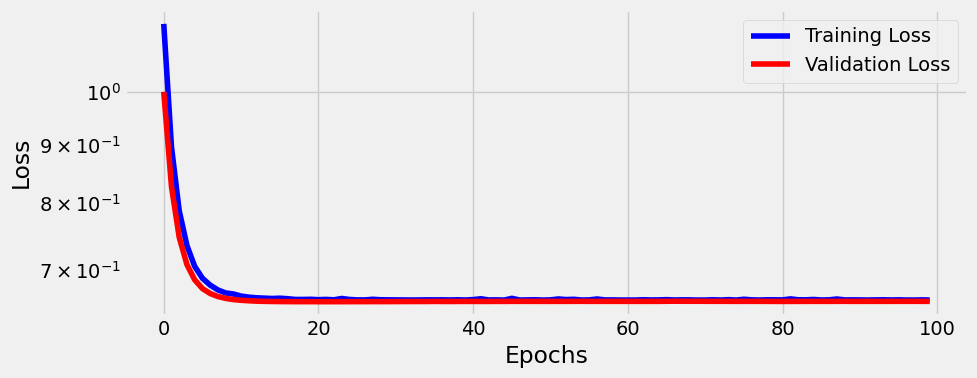

In [ ]:
fig = arch.plot_losses()

In [ ]:
df_depois.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24225 entries, 2 to 42012
Data columns (total 95 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_rate                                24225 non-null  float64
 1   host_is_superhost                                 24225 non-null  int64  
 2   latitude                                          24225 non-null  float64
 3   longitude                                         24225 non-null  float64
 4   accommodates                                      24225 non-null  int64  
 5   bedrooms                                          24225 non-null  float64
 6   beds                                              24225 non-null  float64
 7   price                                             24225 non-null  float64
 8   minimum_nights                                    24225 non-null  int64  
 9   number_of_reviews     

In [ ]:
if arch.losses:
    mean_train_loss = np.mean(arch.losses)
    print(f"Média da Loss no conjunto de treinamento: {mean_train_loss:.4f}")

Média da Loss no conjunto de treinamento: 0.6701


In [ ]:
# Coloca o modelo em modo de avaliação
arch.model.eval()

# Desabilita o cálculo de gradientes
with torch.no_grad():
    # Obtém todos os dados de validação do DataLoader
    val_features = val_data.dataset.tensors[0][val_data.indices]
    val_targets = val_data.dataset.tensors[1][val_data.indices]

    # Move os dados para o mesmo dispositivo do modelo
    val_features = val_features.to(arch.device)
    val_targets = val_targets.to(arch.device)

    # Faz a previsão
    y_pred_normalized = arch.model(val_features)

    # Desnormaliza os valores reais e previstos
    # y_std e y_mu foram calculados no seu código inicial
    # Move y_std and y_mu to the same device as other tensors
    y_std = y_std.to(arch.device)
    y_mu = y_mu.to(arch.device)

    y_pred_denormalized = y_pred_normalized * y_std + y_mu
    y_target_denormalized = val_targets * y_std + y_mu

    # Converte os tensores para CPU e Numpy
    y_pred_np = y_pred_denormalized.cpu().numpy()
    y_target_np = y_target_denormalized.cpu().numpy()

# Calcula a MSE e o RMSE na escala original
from sklearn.metrics import mean_squared_error
final_mse_original = mean_squared_error(y_target_np, y_pred_np)
final_rmse_original = np.sqrt(final_mse_original)

# Imprime os valores
print(f"\nMSE na escala original: {final_mse_original:.4f}")
print(f"RMSE na escala original: {final_rmse_original:.4f}")


MSE na escala original: 33898.4883
RMSE na escala original: 184.1154


# Funções de Normalização e Otimização

In [ ]:
# --- Definir as funções de normalização ---
def z_score_normalize(x_tensor, y_tensor, train_idx):
    eps = 1e-8
    mu_x = x_tensor[train_idx].mean(dim=0)
    std_x = x_tensor[train_idx].std(dim=0, unbiased=False)
    std_x = torch.where(std_x < eps, torch.ones_like(std_x), std_x)
    mu_y = y_tensor[train_idx].mean(dim=0)
    std_y = y_tensor[train_idx].std(dim=0, unbiased=False)
    std_y = torch.where(std_y < eps, torch.ones_like(std_y), std_y)

    x_normalized = (x_tensor - mu_x) / std_x
    y_normalized = (y_tensor - mu_y) / std_y
    return x_normalized, y_normalized, mu_y, std_y

def min_max_normalize(x_tensor, y_tensor, train_idx):
    min_x = x_tensor[train_idx].min(dim=0).values
    max_x = x_tensor[train_idx].max(dim=0).values
    x_normalized = (x_tensor - min_x) / (max_x - min_x + 1e-8)

    min_y = y_tensor[train_idx].min(dim=0).values
    max_y = y_tensor[train_idx].max(dim=0).values
    y_normalized = (y_tensor - min_y) / (max_y - min_y + 1e-8)
    return x_normalized, y_normalized, min_y, max_y

# --- Definir os otimizadores e a taxa de aprendizado ---
optimizers_dict = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'Adagrad': optim.Adagrad
}
lr = 0.0001
n_epochs = 100
batch_size = 16

# Execução dos Experimentos e Visualização dos Resultados

--- Executando experimento 1 de 6: Normalização 'Z-score' e Otimizador 'SGD' ---
Época  10: Perda de Treinamento = 0.6676 | Perda de Validação = 0.6622
Época  20: Perda de Treinamento = 0.6605 | Perda de Validação = 0.6572
Época  30: Perda de Treinamento = 0.6592 | Perda de Validação = 0.6570
Época  40: Perda de Treinamento = 0.6592 | Perda de Validação = 0.6572
Época  50: Perda de Treinamento = 0.6591 | Perda de Validação = 0.6573
Época  60: Perda de Treinamento = 0.6591 | Perda de Validação = 0.6574
Época  70: Perda de Treinamento = 0.6591 | Perda de Validação = 0.6574
Época  80: Perda de Treinamento = 0.6592 | Perda de Validação = 0.6574
Época  90: Perda de Treinamento = 0.6598 | Perda de Validação = 0.6574
Época 100: Perda de Treinamento = 0.6596 | Perda de Validação = 0.6575

RMSE Final na escala original para Z-score + SGD: 184.1518

--- Executando experimento 2 de 6: Normalização 'Z-score' e Otimizador 'Adam' ---
Época  10: Perda de Treinamento = 0.6948 | Perda de Validação = 0.

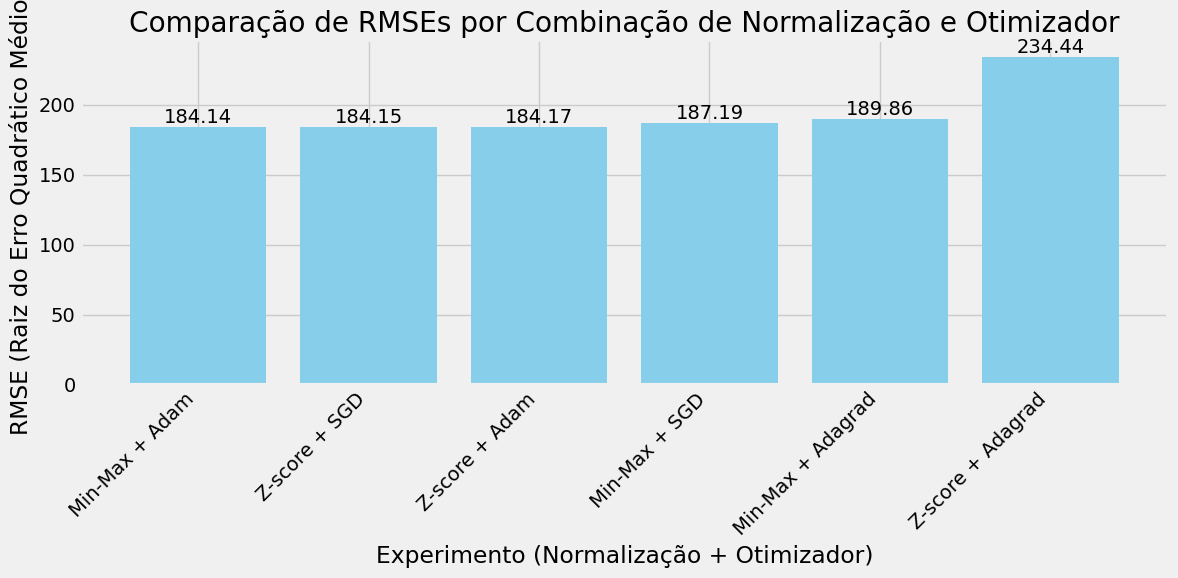

In [ ]:
# --- Definir os otimizadores e a taxa de aprendizado ---
optimizers_dict = {
    'SGD': optim.SGD,
    'Adam': optim.Adam,
    'Adagrad': optim.Adagrad
}
n_epochs = 100
batch_size = 16

# --- Executar os experimentos com a taxa de aprendizado ajustada e Sigmoid para Min-Max ---
results = {}
normalization_methods = {
    'Z-score': z_score_normalize,
    'Min-Max': min_max_normalize
}

arch_objects = {}

for i, (norm_name, opt_name) in enumerate([(n, o) for n in normalization_methods for o in optimizers_dict]):
    # Ajuste da taxa de aprendizado de acordo com a normalização
    if norm_name == 'Min-Max':
        lr = 0.005 # Taxa de aprendizado moderada para dados em pequena escala
        model = nn.Sequential(nn.Linear(X.shape[1], 1), nn.Sigmoid())
    else:
        lr = 0.0001
        model = nn.Sequential(nn.Linear(X.shape[1], 1))

    norm_func = normalization_methods[norm_name]
    opt_func = optimizers_dict[opt_name]

    print(f"--- Executando experimento {i+1} de 6: Normalização '{norm_name}' e Otimizador '{opt_name}' ---")

    x_tensor = torch.as_tensor(X).float()
    y_tensor = torch.as_tensor(y).float()
    dataset = TensorDataset(x_tensor, y_tensor)

    torch.manual_seed(13)
    ratio = 0.8
    n_total = len(dataset)
    n_train = int(n_total * ratio)
    n_val = n_total - n_train
    train_data, val_data = random_split(dataset, [n_train, n_val])
    train_idx = train_data.indices
    val_idx = val_data.indices

    x_normalized, y_normalized, mu_or_min, std_or_max = norm_func(x_tensor, y_tensor, train_idx)
    dataset_normalized = TensorDataset(x_normalized, y_normalized)
    train_data_normalized = Subset(dataset_normalized, train_idx)
    val_data_normalized = Subset(dataset_normalized, val_idx)

    train_loader = DataLoader(dataset=train_data_normalized, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_data_normalized, batch_size=batch_size, shuffle=False)

    optimizer = opt_func(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss(reduction='mean')

    arch = Architecture(model, loss_fn, optimizer)
    arch.set_loaders(train_loader, val_loader)

    # --- NOVO: Loop manual para printar a perda a cada 10 épocas ---
    for epoch in range(1, n_epochs + 1):
        arch.total_epochs += 1
        loss = arch._mini_batch(validation=False)
        arch.losses.append(loss)
        with torch.no_grad():
            val_loss = arch._mini_batch(validation=True)
            arch.val_losses.append(val_loss)

        if epoch % 10 == 0:
            print(f"Época {epoch:3d}: Perda de Treinamento = {loss:.4f} | Perda de Validação = {val_loss:.4f}")

    # Armazena o objeto arch para gerar os gráficos depois
    arch_objects[f'{norm_name} + {opt_name}'] = arch

    arch.model.eval()
    with torch.no_grad():
        val_features_norm = val_data_normalized.dataset.tensors[0][val_data_normalized.indices].to(arch.device)
        val_targets_norm = val_data_normalized.dataset.tensors[1][val_data_normalized.indices].to(arch.device)
        y_pred_normalized = arch.model(val_features_norm)

        mu_or_min = mu_or_min.to(arch.device)
        std_or_max = std_or_max.to(arch.device)

        if norm_name == 'Z-score':
            y_pred_denorm = y_pred_normalized * std_or_max + mu_or_min
            y_target_denorm = val_targets_norm * std_or_max + mu_or_min
        else: # Min-Max
            y_pred_denorm = y_pred_normalized * (std_or_max - mu_or_min) + mu_or_min
            y_target_denorm = val_targets_norm * (std_or_max - mu_or_min) + mu_or_min

        y_pred_np = y_pred_denorm.cpu().numpy()
        y_target_np = y_target_denorm.cpu().numpy()

        final_mse = mean_squared_error(y_target_np, y_pred_np)
        final_rmse = np.sqrt(final_mse)
        results[f'{norm_name} + {opt_name}'] = final_rmse
        print(f"\nRMSE Final na escala original para {norm_name} + {opt_name}: {final_rmse:.4f}\n")

# --- Gerar e salvar os gráficos de perdas para cada modelo ---
for name, arch_obj in arch_objects.items():
    fig = arch_obj.plot_losses()
    plt.title(f"Losses para {name}")
    filename = f"losses_{name.replace(' ', '_').replace('+', '_')}.png"
    plt.savefig(filename)
    plt.close(fig) # Fecha a figura para que ela não seja exibida na tela

    print(f"Gráfico de perdas para {name} salvo como '{filename}'")

# --- Visualizar os resultados finais ---
results_df = pd.DataFrame(list(results.items()), columns=['Experimento', 'RMSE'])
results_df.sort_values(by='RMSE', ascending=True, inplace=True)
results_df.to_csv('resultados_experimentos.csv', index=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(results_df['Experimento'], results_df['RMSE'], color='skyblue')
plt.title('Comparação de RMSEs por Combinação de Normalização e Otimizador')
plt.xlabel('Experimento (Normalização + Otimizador)')
plt.ylabel('RMSE (Raiz do Erro Quadrático Médio)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.savefig('comparacao_rmse.png')

print("\nResultados Finais:")
print(results_df)
print("\nGráfico de comparação de RMSEs salvo como 'comparacao_rmse.png'")
print("Resultados salvos em 'resultados_experimentos.csv'")

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# O LazyRegressor não requer dados normalizados, mas vamos usá-los para uma comparação justa.
X_train_lp, X_test_lp, y_train_lp, y_test_lp = train_test_split(X_clean_robusto, y_clean_robusto, test_size=0.2, random_state=42)


# Inicializa e treina os modelos
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train_lp, X_test_lp, y_train_lp, y_test_lp)

print("\n--- Resultados do LazyPredict (Top 5 Modelos) ---")
display(models.head(5))

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 19380, number of used features: 12
[LightGBM] [Info] Start training from score 387.686842

--- Resultados do LazyPredict (Top 5 Modelos) ---


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.40,0.41,172.40,0.35
HistGradientBoostingRegressor,0.40,0.41,172.45,0.54
GradientBoostingRegressor,0.38,0.39,174.88,4.26
XGBRegressor,0.37,0.38,175.92,0.48
RandomForestRegressor,0.37,0.38,176.08,16.21
